# Data Cleaning : Airbnb Listings
In this notebook we are going to deal with data from a well-known residential rental application, Airbnb. Specifically, the data for the Chicago area for 3 months of 2023 (January, February and March).

In [57]:
#Importing the basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [58]:
# Libraries used for Modelling
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

In [59]:
# reading the csv files
listings_df = pd.read_csv("listings.csv")
reviews_df = pd.read_csv("reviews.csv")

## Data Cleaning : Listings.csv
1. We drop any entries that are missing (NaN) values.
2. We also drop any entries that are inconsistent such as price with a value of 0.

In [60]:
print(listings_df.shape)
listings_df.info()

(7747, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7747 entries, 0 to 7746
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7747 non-null   int64  
 1   name                            7747 non-null   object 
 2   host_id                         7747 non-null   int64  
 3   host_name                       7747 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7747 non-null   object 
 6   latitude                        7747 non-null   float64
 7   longitude                       7747 non-null   float64
 8   room_type                       7747 non-null   object 
 9   price                           7747 non-null   int64  
 10  minimum_nights                  7747 non-null   int64  
 11  number_of_reviews               7747 non-null   int64  
 12  last_review            

In [61]:
# determine the number of missing entries in each column of Listings.csv
for col in listings_df.columns:
    print (col + ', Number of Missing Values:', len(listings_df[col][listings_df[col].isnull()]))

id, Number of Missing Values: 0
name, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_name, Number of Missing Values: 0
neighbourhood_group, Number of Missing Values: 7747
neighbourhood, Number of Missing Values: 0
latitude, Number of Missing Values: 0
longitude, Number of Missing Values: 0
room_type, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
last_review, Number of Missing Values: 1493
reviews_per_month, Number of Missing Values: 1493
calculated_host_listings_count, Number of Missing Values: 0
availability_365, Number of Missing Values: 0
number_of_reviews_ltm, Number of Missing Values: 0
license, Number of Missing Values: 1174


#### According to the above output, neighbourhood_group, last_review, reviews_per_month, and license columns have missing values.

In [62]:
# Checking whether this column has only null values
if listings_df['neighbourhood_group'].isna().all():
    print("neighbourhood_group has all NaN values")
else:
    print("neighbourhood_group does not have all NaN values")

neighbourhood_group has all NaN values


In [63]:
# As neighbourhood_group has only null values and cannot be replaced with any other values, so this column has to be dropped.
listings_df.drop('neighbourhood_group', axis = 1, inplace = True)
#listings_df.to_csv('listings.csv', index=False)

In [64]:
#Let's check whether there are any listings with price 0.00 (inconsistent values)
print ('Number of Listings with Price $0.00:', len(listings_df[listings_df['price'] == 0.00]))

Number of Listings with Price $0.00: 2


In [65]:
#As there are two listings with price 0.00, let's drop those two listings.
listings_df = listings_df[listings_df['price'] != 0.00]
print ('Number of Listings with Price $0.00:', len(listings_df[listings_df['price'] == 0.00]))

Number of Listings with Price $0.00: 0


In [66]:
# Then, let's drop all the records with null values as the missing values for last_review, reviews_per_month and license columns cannot be replaced with any other values.
listings_df = listings_df.dropna()

In [67]:
for col in listings_df.columns:
    print (col + ', Number of Missing Values:', len(listings_df[col][listings_df[col].isnull()]))

id, Number of Missing Values: 0
name, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_name, Number of Missing Values: 0
neighbourhood, Number of Missing Values: 0
latitude, Number of Missing Values: 0
longitude, Number of Missing Values: 0
room_type, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
last_review, Number of Missing Values: 0
reviews_per_month, Number of Missing Values: 0
calculated_host_listings_count, Number of Missing Values: 0
availability_365, Number of Missing Values: 0
number_of_reviews_ltm, Number of Missing Values: 0
license, Number of Missing Values: 0


In [68]:
listings_df.shape

(5888, 17)

#### Our dataset is now clean and we no longer have any missing values or inconsistent values. We have a total of 5888 records from the original 7747; thus, we've retained a reasonable amount of records. 

## Data Cleaning : Reviews.csv

In [69]:
print(reviews_df.shape)
reviews_df.info()

(355888, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355888 entries, 0 to 355887
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  355888 non-null  int64 
 1   date        355888 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.4+ MB


In [70]:
# determine the number of missing entries in each column of reviews.csv
for col in reviews_df.columns:
    print (col + ', Number of Missing Values:', len(reviews_df[col][reviews_df[col].isnull()]))

listing_id, Number of Missing Values: 0
date, Number of Missing Values: 0


#### According to the above output, only comments column has 92 missing values and these missing values cannot be replaced by any other values. Hence, the rows with missing values has to be dropped.

In [71]:
reviews_df = reviews_df.dropna()
reviews_df.shape

(355888, 2)

In [72]:
for col in reviews_df.columns:
    print (col + ', Number of Missing Values:', len(reviews_df[col][reviews_df[col].isnull()]))

listing_id, Number of Missing Values: 0
date, Number of Missing Values: 0


#### Reviews dataset doesn't have any missing values. Hence Reviews dataset has been cleaned successfully.

In [73]:
#Renaming the "id" column name of the listings dataframe so that it has the same name as the "listing_id" column of reviews dataframe.
listings_df = listings_df.rename(columns={'id': 'listing_id'})
listings_df.head()

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Hyde Park - Walk to UChicago,2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,90,3,212,2023-03-04,2.13,1,347,20,R17000015609
1,94450,Comfy Garden Suite in Andersonville,504470,Mark,Edgewater,41.97960,-87.66512,Entire home/apt,65,7,7,2022-12-01,0.88,1,178,7,R22000082956
2,145659,Trendy Roscoe Village 3BR/2BR walk to shops,683529,Joe,North Center,41.94342,-87.68121,Entire home/apt,198,2,59,2022-12-31,0.65,22,330,15,2209272
3,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,85,2,483,2023-02-26,2.89,1,279,48,R21000075737
4,189821,"Best in Chicago, private, amazing garden space",899757,Meighan,Logan Square,41.92918,-87.70219,Entire home/apt,202,3,598,2023-02-25,4.27,1,207,24,R21000062936


### Merging the two dataframes

In [74]:
# Merging the two dataframes with the common column "listing_id".
merged_df = pd.merge(listings_df, reviews_df, on='listing_id')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352069 entries, 0 to 352068
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   listing_id                      352069 non-null  int64  
 1   name                            352069 non-null  object 
 2   host_id                         352069 non-null  int64  
 3   host_name                       352069 non-null  object 
 4   neighbourhood                   352069 non-null  object 
 5   latitude                        352069 non-null  float64
 6   longitude                       352069 non-null  float64
 7   room_type                       352069 non-null  object 
 8   price                           352069 non-null  int64  
 9   minimum_nights                  352069 non-null  int64  
 10  number_of_reviews               352069 non-null  int64  
 11  last_review                     352069 non-null  object 
 12  reviews_per_mont

# Modelling


## Importing dataset

Based on the work done during Exploratory Data Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:

- Room Type
- Minimum Number of Nights
- Number of Reviews

As such, we single out these variables (together with price) to form a new dataframe.

In [75]:
polarity_reviews_df = pd.read_csv("polarity_reviews.csv")
listings_df1 = pd.merge(listings_df, polarity_reviews_df, on='listing_id', how='left')

In [76]:
listings_df1.dropna()
indices_to_keep = ~listings_df1.isin([np.nan, np.inf, -np.inf]).any(axis=1)
listings_df1 = listings_df1[indices_to_keep]

In [77]:
new_listings_df = listings_df1[['room_type','polarity_value','number_of_reviews', 'price']]
new_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328458 entries, 0 to 328837
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   room_type          328458 non-null  object 
 1   polarity_value     328458 non-null  float64
 2   number_of_reviews  328458 non-null  int64  
 3   price              328458 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.5+ MB


# Regression Models

Regression models are used to target a prediction value based on independent variables and it is mostly used for finding out the relationship between variables as well as prediction/forecasting.

Here, we use regression models to help predict the price based on the significant predictor variables identified in Exploratory Analysis.

Predictor Variables: room_type, number_of_reviews, minimum_nights
Response Variable: price
The following regression models will be carried out:

- Linear Regression

- Ridge Regression

- Lasso Regression

- Random Forest Regression

### Data Preparation

The following will be done to the data to ensure its fit into the different regression models:

- Encoding the categorical variables so that it can be fit into the regression models
- Separating the data into predictor and response variables
- Separating the data into training and testing sets (Training Sets: Testing Sets = 80% : 20%)

In [78]:
# One-hot encode the Categorial variables
transformed_df = pd.get_dummies(new_listings_df, columns=['room_type'])

#renaming some categories to remove '/' and blank spaces
new_transformed_df = transformed_df.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
new_transformed_df = new_transformed_df.rename(columns={'room_type_Hotel room': 'room_type_Hotel_room'})
new_transformed_df =new_transformed_df.rename(columns={'room_type_Private room': 'room_type_Private_room'})
new_transformed_df =new_transformed_df.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})

new_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328458 entries, 0 to 328837
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   polarity_value             328458 non-null  float64
 1   number_of_reviews          328458 non-null  int64  
 2   price                      328458 non-null  int64  
 3   room_type_Entire_home_apt  328458 non-null  uint8  
 4   room_type_Hotel_room       328458 non-null  uint8  
 5   room_type_Private_room     328458 non-null  uint8  
 6   room_type_Shared_room      328458 non-null  uint8  
dtypes: float64(1), int64(2), uint8(4)
memory usage: 11.3 MB


In [79]:
# Separating X and y for Modelling
new_transformed_df1 = new_transformed_df.drop('price', axis=1)
x = pd.DataFrame(new_transformed_df1) #Predictor Variables
y = pd.DataFrame(new_transformed_df["price"]) #Response Variables

# Scaling
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=list(x.columns))
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328458 entries, 0 to 328457
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   polarity_value             328458 non-null  float64
 1   number_of_reviews          328458 non-null  float64
 2   room_type_Entire_home_apt  328458 non-null  float64
 3   room_type_Hotel_room       328458 non-null  float64
 4   room_type_Private_room     328458 non-null  float64
 5   room_type_Shared_room      328458 non-null  float64
dtypes: float64(6)
memory usage: 15.0 MB


In [80]:
# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Model 1: Linear Regression

Linear Regression is a machine learning algorithm that is based on supervised learning. It performs the regression task to predict a dependent variable value (in this case, price) based on given independent variables (in this case, the identified predictor variables).

It then tries to find a linear relationship between the variables and predicts the price based on the linear line.

Here, we have trained the model to follow the following formula:

Regression Problem : Price = a * (Predictor Variables) + b 

The above is a general formula, however, since we have multiple predictor variables, there will be more than 1 coefficient (one for each predictor variable).

In [81]:
# Creating and fitting the model
linreg = LinearRegression()     
linreg.fit(x_train, y_train)

LinearRegression()

In [82]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [168.44397302]

                  Predictors  Coefficients
0             polarity_value      6.842041
1          number_of_reviews    -21.845040
2  room_type_Entire_home_apt     19.757145
3       room_type_Hotel_room     11.179127
4     room_type_Private_room    -22.812584
5      room_type_Shared_room     -9.571525



**Note that:** A positive coefficient indicates that as the predictor variable increases, the response variable also increases. A negative coefficient indicates that as the predictor variable increases, the response variable decreases.

In [83]:
# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(x_train)
testPredictionLR = linreg.predict(x_test)

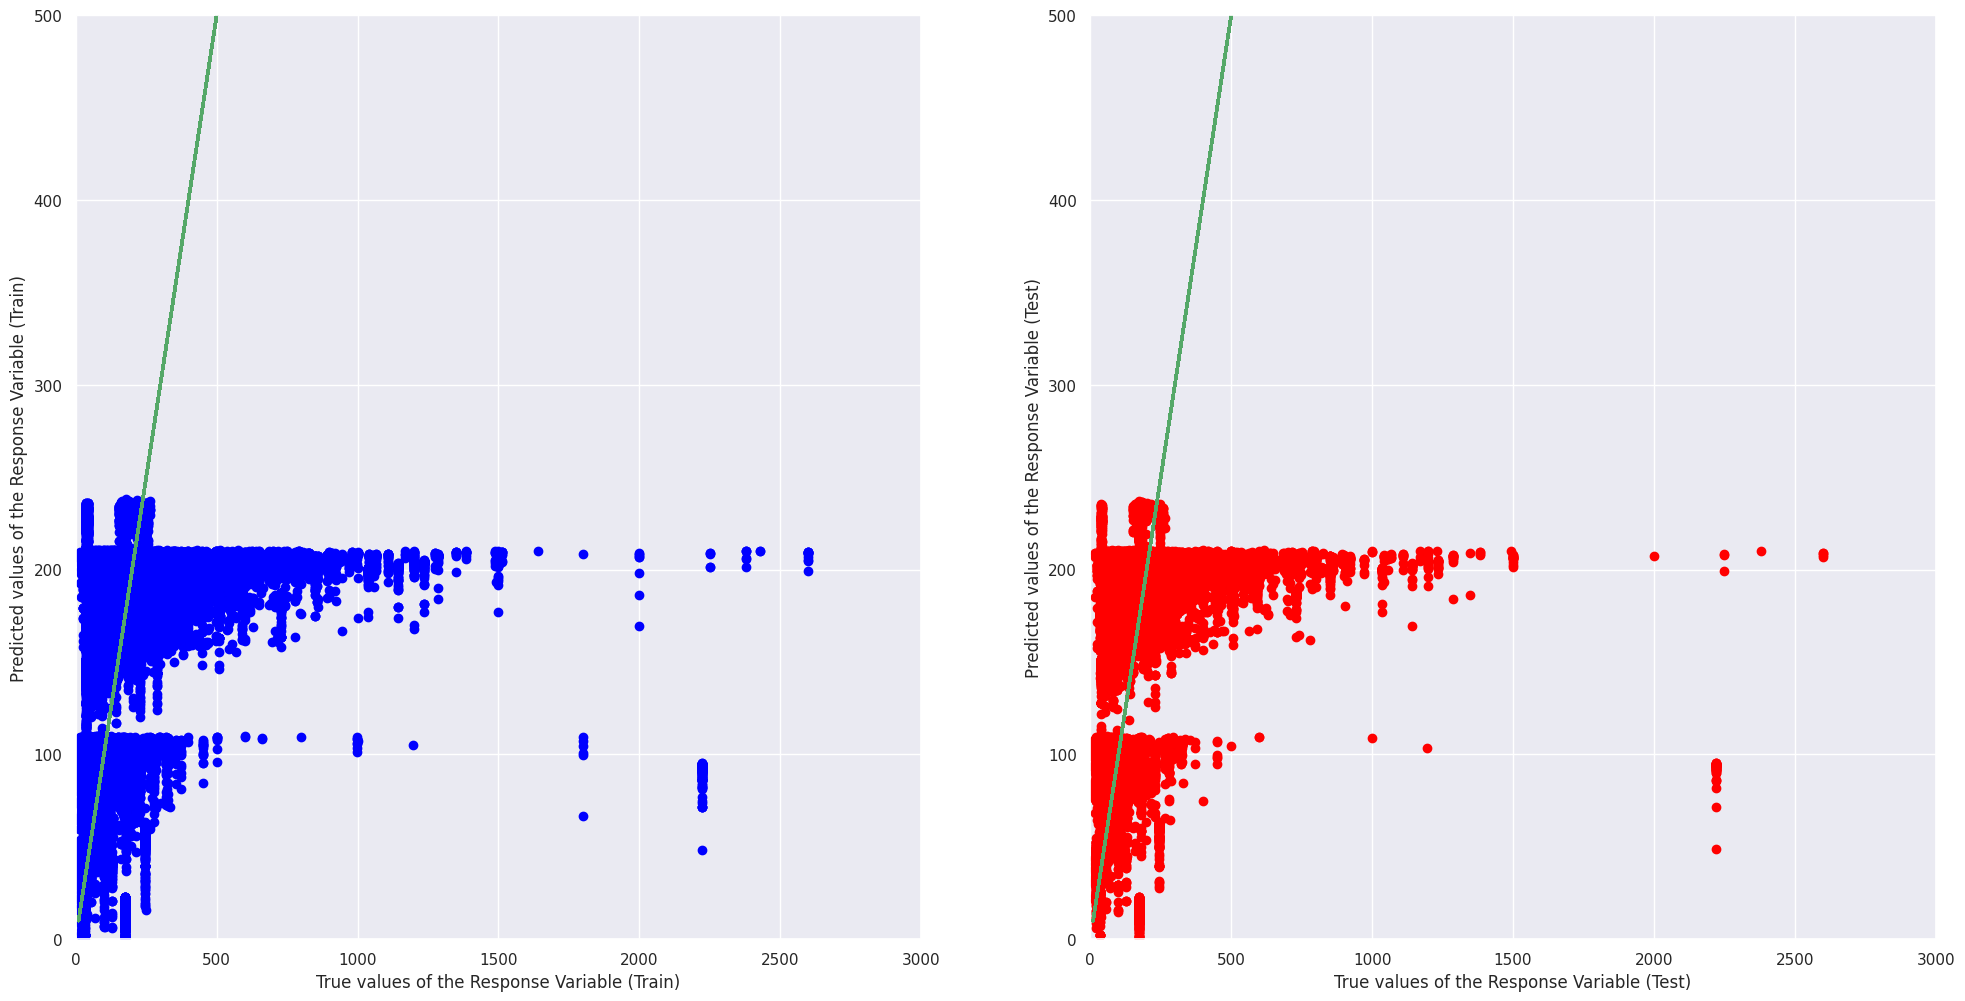

In [84]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_xlim([0, 3000])
axes[0].set_ylim([0, 500])
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlim([0, 3000])
axes[1].set_ylim([0, 500])
plt.show()

**Note that:** Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

### Model 2: Lasso Regression

Lasso Regression is meant to be an upgrade to linear regression, it also can be used for Regression and Classification.

Lasso Regression can be used for feature selection, where some predictors will be dropped after a lambda reaches a certain value.

Lasso Regression also requires a λ value to be iterated to find the best fit.

In [85]:
#numpy array used for plotting Lasso Regression later on
varArr = np.array(["polarity_value","number_of_reviews","room_type_Entire_home_apt","room_type_Hotel_room",
                              "room_type_Private_room", "room_type_Shared_room"])

In [86]:
#initialising the model
lassoReg = Lasso(alpha=1)
lassoReg.fit(x_train, y_train)
#stores prediction
lassoTrainPred = []
lassoTestPred = []
lassoR2score=[] #stores R2 value

lassoDF = pd.DataFrame({'variable': varArr, 'estimate': lassoReg.coef_.ravel()})

lambdas = np.arange(0.01, 8.01, 0.02)#lambda value of 0.01 to 8.01, in intervals of 0.02

for i,alpha in enumerate(lambdas):
    lassoReg = Lasso(alpha=alpha)
    lassoReg.fit(x_train, y_train)
    var_name = 'estimate'+ str(i+1)
    lassoDF = pd.concat([lassoDF, pd.DataFrame(lassoReg.coef_.ravel(), columns=[var_name], index=lassoDF.index)], axis=1)
    #prediction
    lassoTrainPred.append(lassoReg.predict(x_train))
    lassoTestPred.append(lassoReg.predict(x_test))
    #storing the r2 score 
    lassoR2score.append(lassoReg.score(x_train,y_train))


bestLassoR2 = max(lassoR2score)
print("The highest R2 value: ",bestLassoR2)


#Using the best fit Lasso Regression Model's predictions
trainPredictionLasso = lassoTrainPred[lassoR2score.index(bestLassoR2)]
testPredictionLasso = lassoTestPred[lassoR2score.index(bestLassoR2)]

lassoDF = lassoDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

lassoDF.head()

The highest R2 value:  0.001107934489379847


variable,1,polarity_value,number_of_reviews,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room
0,estimate,5.815182,-19.177674,0.000000,1.589841,-40.806198,-12.465435
1,estimate1,6.831781,-21.818326,39.481986,18.088979,-3.968498,-5.636599
2,estimate2,6.811278,-21.765441,33.777277,16.030716,-9.398428,-6.750891
3,estimate3,6.790769,-21.712374,29.958041,14.635360,-13.027913,-7.490038
4,estimate4,6.770261,-21.659308,26.138805,13.240004,-16.657399,-8.229185


(0.0, 500.0)

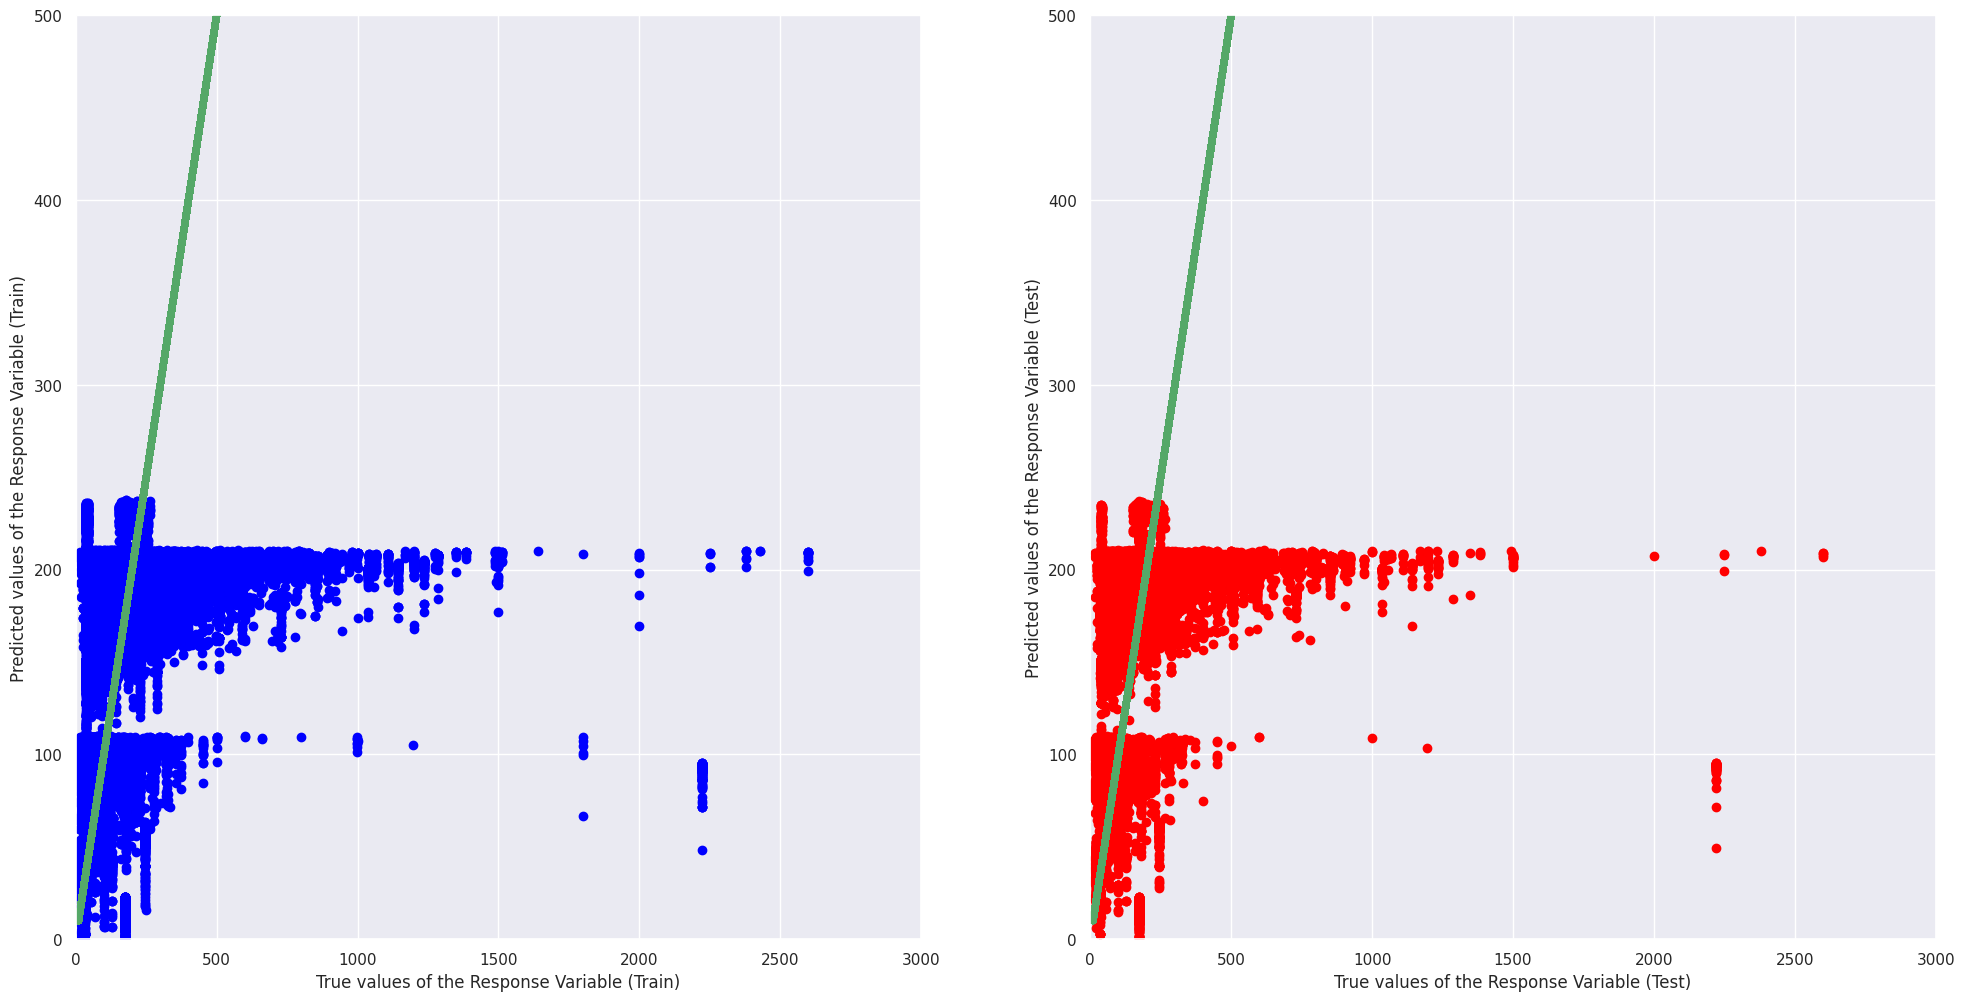

In [87]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLasso, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_xlim([0, 3000])
axes[0].set_ylim([0, 500])
axes[1].scatter(y_test, testPredictionLasso, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlim([0, 3000])
axes[1].set_ylim([0, 500])

### Model 3 : Random Forest Regression

Random Forest is an emsemble technique that is able to perform both Regression and Classification tasks with the use of multiple decision trees and a technique that is called Bootstrap Aggression. The idea behind this technique is to combine multiple decision trees in its prediction rather than replying on individual decision trees.

Here, we use the RandomForestRegressor to help predict the price

In [88]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5)
RF.fit(x_train,y_train.values.ravel())
# Predicting the training and testing sets
trainPredictin_RF = RF.predict(x_train)
testPredictin_RF =RF.predict(x_test)

In [89]:
importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=x_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

,Weight
room_type_Shared_room,0.000006
room_type_Hotel_room,0.000302
room_type_Private_room,0.004766
room_type_Entire_home_apt,0.034413
number_of_reviews,0.166912
polarity_value,0.793600


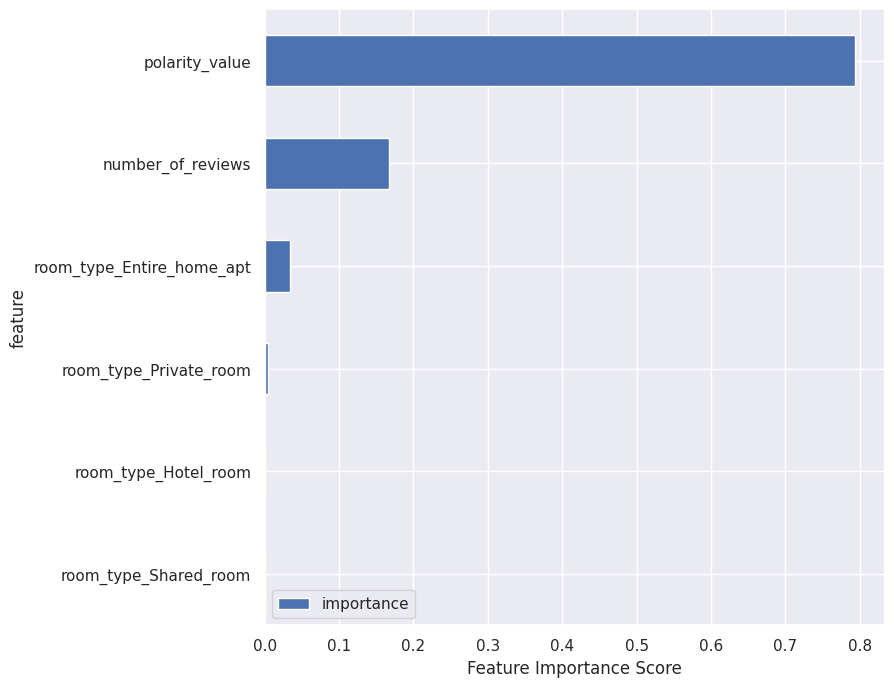

In [90]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = x_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

(0.0, 500.0)

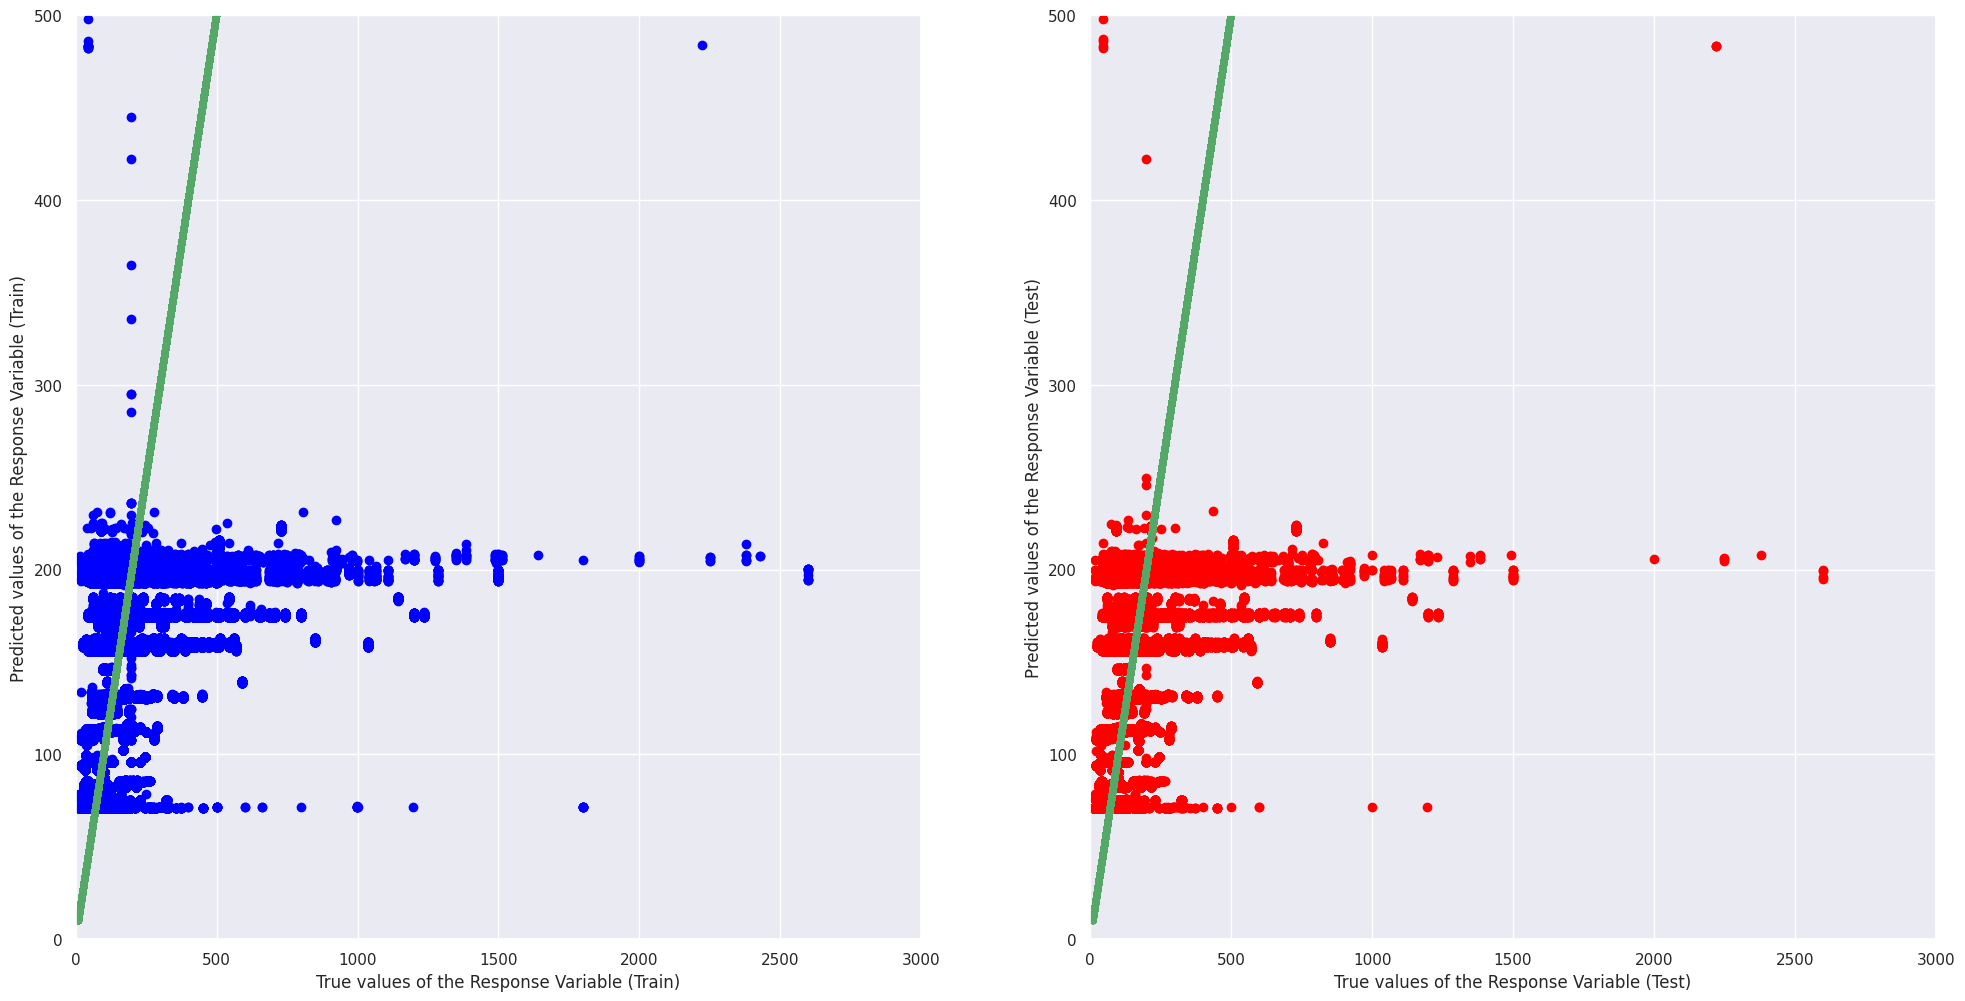

In [91]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_xlim([0, 3000])
axes[0].set_ylim([0, 500])
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlim([0, 3000])
axes[1].set_ylim([0, 500])

### Evaluation of Models

#### Train Test Split

Validation of model performance is done using Train/Test Set Split in which the data set is split into 80% : 20%.

In [92]:
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
print()
print("Performance Metrics for Test Set")
print("--------------------------------")
print("Linear Regression (MSE):", round(mean_squared_error(y_test, testPredictionLR),4))
print("Linear Regression (R^2):", round(r2_score(y_test, testPredictionLR),4))

print("\nLasso Regression (MSE):", round(mean_squared_error(y_test, testPredictionLasso),4))
print("Lasso Regression (R^2):", round(r2_score(y_test, testPredictionLasso),4))

print("\nRandom Forest Regression (MSE):", round(mean_squared_error(y_test, testPredictin_RF),4))
print("Random Forest Regression (R^2):", round(r2_score(y_test, testPredictin_RF),4))
print()
print("\nPerformance Metrics for Train Set")
print("-----------------------------------")
print("Linear Regression (R^2):", round(r2_score(y_train, trainPredictionLR),4))
print("Lasso Regression (R^2):", round(r2_score(y_train, trainPredictionLasso),4))
print("Random Forest Regression (R^2):", round(r2_score(y_train, trainPredictin_RF),4))

Goodness Fit on the Models (Train/Test Split):

Performance Metrics for Test Set
--------------------------------
Linear Regression (MSE): 1764567.533
Linear Regression (R^2): 0.0012

Lasso Regression (MSE): 1764567.4603
Lasso Regression (R^2): 0.0012

Random Forest Regression (MSE): 1888287.6903
Random Forest Regression (R^2): -0.0688


Performance Metrics for Train Set
-----------------------------------
Linear Regression (R^2): 0.0011
Lasso Regression (R^2): 0.0011
Random Forest Regression (R^2): 0.305


In [93]:
polarity_reviews_df = pd.read_csv("polarity_reviews.csv")
listings_df = pd.merge(listings_df, polarity_reviews_df, on='listing_id', how='left')


# **CLASSIFICATION**

Classification models are machine learning algorithms used to predict the categorical class of a given input based on a set of features or variables. The goal is to learn from a labeled dataset and then use that learning to predict the correct class label for new, unseen data.

The following classification models will be carried out:

Logistic Regression

Decision Trees

Random Forest Classifier

# CLASSIFICATION MODELS 

**MODEL 1 : LOGISTIC REGRESSION**

Logistic regression is a statistical model used to analyze the relationship between a binary dependent variable (such as yes/no, true/false, etc.) and one or more independent variables, by estimating probabilities using a logistic function. It is commonly used for classification tasks where the outcome variable is a discrete binary value.

Here we are using it to predict the sentiment label : positive or negative


In [94]:
# Create a binary target variable 'sentiment_label' based on the compound score
listings_df['sentiment_label'] = np.where(listings_df['compound'] >= 0, 'positive', 'negative')

# Selecting relevant columns
features = listings_df[['number_of_reviews', 'price']]
target = listings_df['sentiment_label']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Create the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Confusion Matrix:
[[    0  1414]
 [    0 64400]]

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1414
    positive       0.98      1.00      0.99     64400

    accuracy                           0.98     65814
   macro avg       0.49      0.50      0.49     65814
weighted avg       0.96      0.98      0.97     65814


Accuracy Score:
0.9785152095298872


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**MODEL 2 : DECISION TREES** 

Decision trees are a type of supervised learning algorithm used for both classification and regression tasks. They work by recursively splitting the input data into subsets based on the values of the input features. The goal is to create a tree-like structure where each split maximizes the homogeneity of the target variable within each subset. A decision tree classifier can help identify the most important features that affect the sentiment of the listings. By analyzing the structure of the decision tree, you can gain insights into how the features interact with each other and how they contribute to the prediction of the sentiment label. This information can be valuable for hosts in understanding what factors might lead to positive or negative sentiment and for guests in identifying potential issues that might impact their experience.


Here,  a decision tree can be used to predict the sentiment label ('positive' or 'negative') based on the features such as 'number_of_reviews' and 'price'. The algorithm will learn the best splits of the data based on these features to accurately predict the sentiment label.

In [95]:
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree model
dtree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtree.predict(X_test)

# Calculate performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[   32  1382]
 [   40 64360]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.44      0.02      0.04      1414
    positive       0.98      1.00      0.99     64400

    accuracy                           0.98     65814
   macro avg       0.71      0.51      0.52     65814
weighted avg       0.97      0.98      0.97     65814


Accuracy Score:
0.9783936548454736


The results of the Decision Tree Classifier show that the model performs quite well in predicting the sentiment labels (positive or negative) using the number of reviews and price as features. The overall accuracy is 97.84%.

However, it's important to note that the classification report indicates a significant difference in performance between the two classes. The model has a high precision, recall, and f1-score for the positive class, but these metrics are much lower for the negative class. This could be due to the imbalance between the two classes in the dataset.

You may consider using techniques like oversampling the minority class (negative) or undersampling the majority class (positive) to balance the classes and potentially improve the model's performance on the negative class.

**MODEL 3: RANDOM FOREST CLASSIFIER**

Random Forest Classifier is an ensemble learning method used for both classification and regression tasks. It works by constructing multiple decision trees during the training phase and outputting the class that is the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

Here the Random Forest Classifier can be used to predict the sentiment label ('positive' or 'negative') based on features like 'number_of_reviews' and 'price'. The algorithm will learn multiple decision trees and combine their predictions to improve the overall accuracy and stability of the model.

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[   28  1386]
 [   22 64378]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.56      0.02      0.04      1414
    positive       0.98      1.00      0.99     64400

    accuracy                           0.98     65814
   macro avg       0.77      0.51      0.51     65814
weighted avg       0.97      0.98      0.97     65814


Accuracy Score:
0.9786063755431975


The results of the Random Forest Classifier show that the model performs well in predicting the sentiment labels (positive or negative) using the number of reviews and price as features. The overall accuracy is 97.86%.

Similar to the Decision Tree Classifier, the classification report indicates a significant difference in performance between the two classes. The model has a high precision, recall, and f1-score for the positive class, but these metrics are much lower for the negative class. This could be due to the imbalance between the two classes in the dataset.

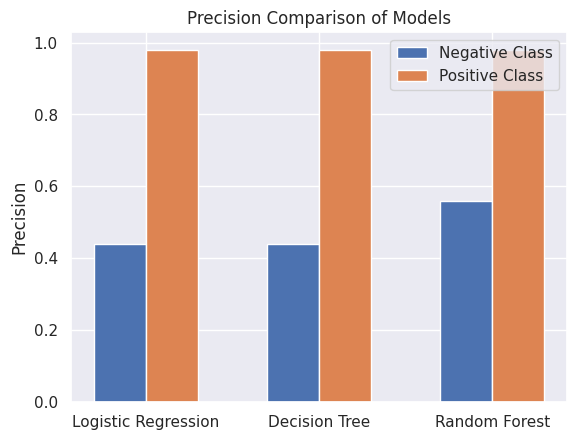

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Store the classification reports as dictionaries
log_reg_report = {'negative': {'precision': 0.44, 'recall': 0.02, 'f1-score': 0.04},
                  'positive': {'precision': 0.98, 'recall': 1.00, 'f1-score': 0.99}}

decision_tree_report = {'negative': {'precision': 0.44, 'recall': 0.02, 'f1-score': 0.04},
                        'positive': {'precision': 0.98, 'recall': 1.00, 'f1-score': 0.99}}

random_forest_report = {'negative': {'precision': 0.56, 'recall': 0.02, 'f1-score': 0.04},
                        'positive': {'precision': 0.98, 'recall': 1.00, 'f1-score': 0.99}}

def plot_metric_comparison(models_reports, metric):
    # Extract values for each model
    model_names = list(models_reports.keys())
    neg_values = [report['negative'][metric] for report in models_reports.values()]
    pos_values = [report['positive'][metric] for report in models_reports.values()]

    # Define bar width and positions
    bar_width = 0.3
    neg_positions = np.arange(len(model_names))
    pos_positions = [x + bar_width for x in neg_positions]

    # Create bar plots
    plt.bar(neg_positions, neg_values, width=bar_width, label='Negative Class')
    plt.bar(pos_positions, pos_values, width=bar_width, label='Positive Class')

    # Add x-axis labels and ticks
    plt.xticks([r + bar_width / 2 for r in range(len(model_names))], model_names)

    # Add y-axis label and title
    plt.ylabel(f'{metric.capitalize()}')
    plt.title(f'{metric.capitalize()} Comparison of Models')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()

models_reports = {'Logistic Regression': log_reg_report,
                  'Decision Tree': decision_tree_report,
                  'Random Forest': random_forest_report}

plot_metric_comparison(models_reports, 'precision')


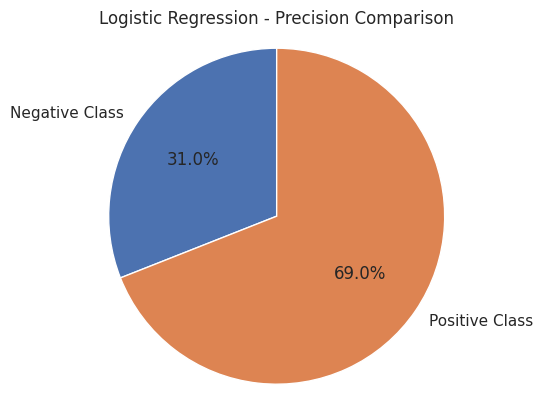

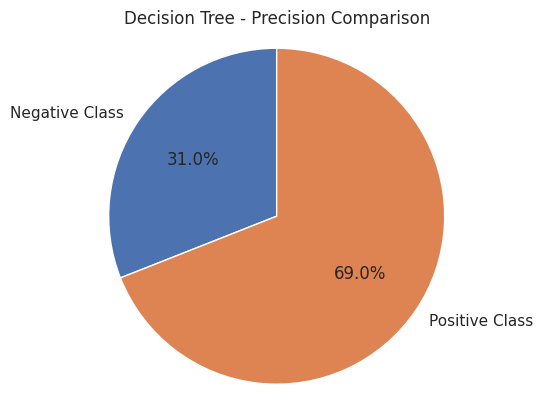

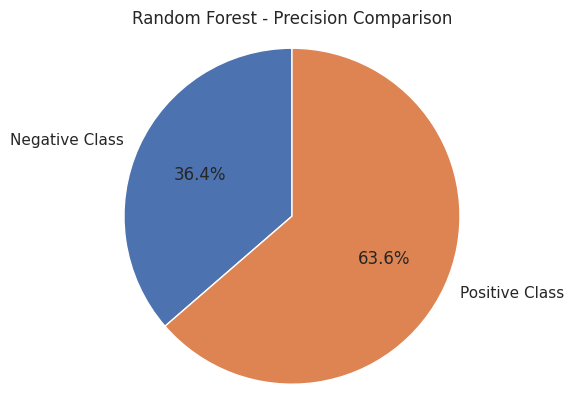

In [98]:
def plot_metric_comparison_pie(models_reports, metric):
    model_names = list(models_reports.keys())
    neg_values = [report['negative'][metric] for report in models_reports.values()]
    pos_values = [report['positive'][metric] for report in models_reports.values()]

    for i, model_name in enumerate(model_names):
        sizes = [neg_values[i], pos_values[i]]
        labels = ['Negative Class', 'Positive Class']
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title(f'{model_name} - {metric.capitalize()} Comparison')
        plt.show()

plot_metric_comparison_pie(models_reports, 'precision')

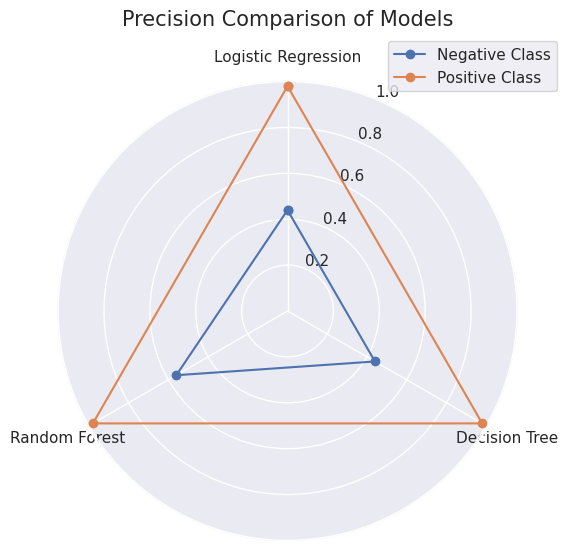

In [99]:
def plot_metric_comparison_radar(models_reports, metric):
    model_names = list(models_reports.keys())
    num_vars = len(model_names)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    neg_values = [report['negative'][metric] for report in models_reports.values()]
    pos_values = [report['positive'][metric] for report in models_reports.values()]

    neg_values += neg_values[:1]
    pos_values += pos_values[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.plot(angles, neg_values, label='Negative Class', marker='o')
    ax.plot(angles, pos_values, label='Positive Class', marker='o')

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(model_names)

    ax.set_title(f'{metric.capitalize()} Comparison of Models', y=1.1, fontsize=15)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

plot_metric_comparison_radar(models_reports, 'precision')

# **CLUSTERING**

Clustering can be applied to the Airbnb dataset for various purposes, such as segmenting listings based on their features or identifying patterns in the data. Clustering is an unsupervised learning technique that groups data points based on their similarity. It can provide insights into the structure of the data and reveal previously unknown relationships.

But here, we are using clustering to group Airbnb listings based on features like price, and number of reviews. This can help identify distinct types of listings, such budget, and popular rentals.

# K means Clustering
K-means clustering is an unsupervised learning algorithm that aims to partition a dataset into K distinct clusters (groups) based on the similarity of data points. The goal is to minimize the sum of squared distances between the data points and their corresponding cluster centroids. The algorithm iterates between two main steps until convergence:

Assignment step: Each data point is assigned to the nearest centroid.
Update step: The centroids are updated by taking the mean of all data points assigned to that centroid.
The quality of the final clustering depends on the initial choice of centroids. One common method to initialize the centroids is the K-means++ algorithm, which selects centroids in a way that spreads them out across the data space.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

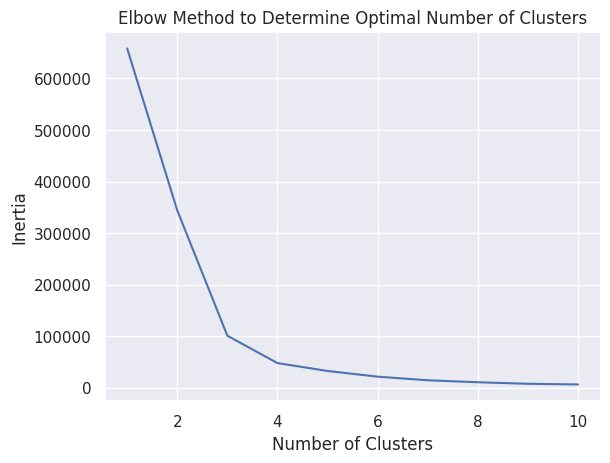

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


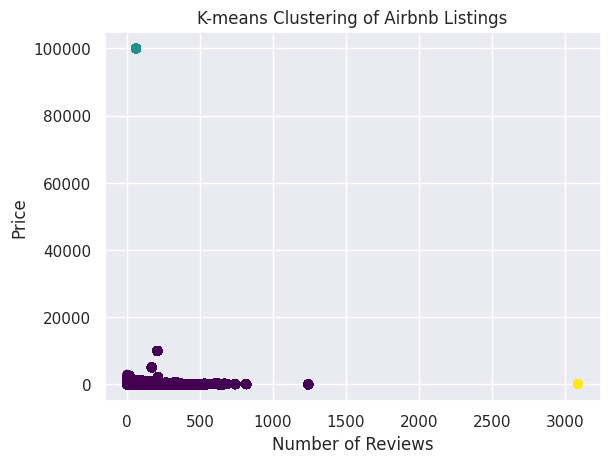

In [100]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = listings_df[['number_of_reviews', 'price']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Find the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(cluster_range, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.show()

# Fit the K-means clustering model with the optimal number of clusters
optimal_clusters = 3  # Based on the elbow method plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
listings_df['cluster'] = clusters

# Visualize the clusters
plt.scatter(listings_df['number_of_reviews'], listings_df['price'], c=listings_df['cluster'], cmap='viridis')
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.title("K-means Clustering of Airbnb Listings")
plt.show()


*The above are just warnings but not errors , the code has run without any errors! The warnings are due to the default value of the n_init parameter.*

The clustering example provided above, which uses the K-means algorithm on features like "number_of_reviews" and "price," can help answer the problem statement related to the segmentation of Airbnb listings. It can reveal patterns in the data that might not be apparent through other methods of analysis.

How are Airbnb listings distributed based on their price and popularity (number of reviews)?

This information can be valuable for both hosts and guests, as it can help them make informed decisions about listing or booking properties on the platform.

For hosts, understanding the different clusters of Airbnb listings can help them identify gaps in the market, position their properties more effectively, and set competitive prices. For guests, the clustering can assist them in identifying the types of listings that best suit their preferences and budget.